Exploratory Data Analysis

In [4]:
import pandas as pd

cashrequest_df = pd.read_csv("project_dataset/cashreq-clean.csv")
fees_and_cohorts_df = pd.read_csv("project_dataset/fees-with-cohort-and-user-id-clean.csv")

/var/folders/l6/tml7nl0s2dz6x09lhsl8hj840000gn/T/ipykernel_84147/1667466518.py:4: DtypeWarning: Columns (29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  fees_and_cohorts_df = pd.read_csv("project_dataset/fees-with-cohort-and-user-id-clean.csv")


In [7]:
# filtered only incidents
fees_with_user_id_and_cohort = fees_and_cohorts_df.sort_values('cohort') # ordered by cohort for the chart
incident_feed = fees_with_user_id_and_cohort[fees_with_user_id_and_cohort["type"] == "incident"]

/var/folders/l6/tml7nl0s2dz6x09lhsl8hj840000gn/T/ipykernel_84147/2117391752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=incident_feed, x='cohort', palette='viridis')  # <- Notice y='Country' instead of x


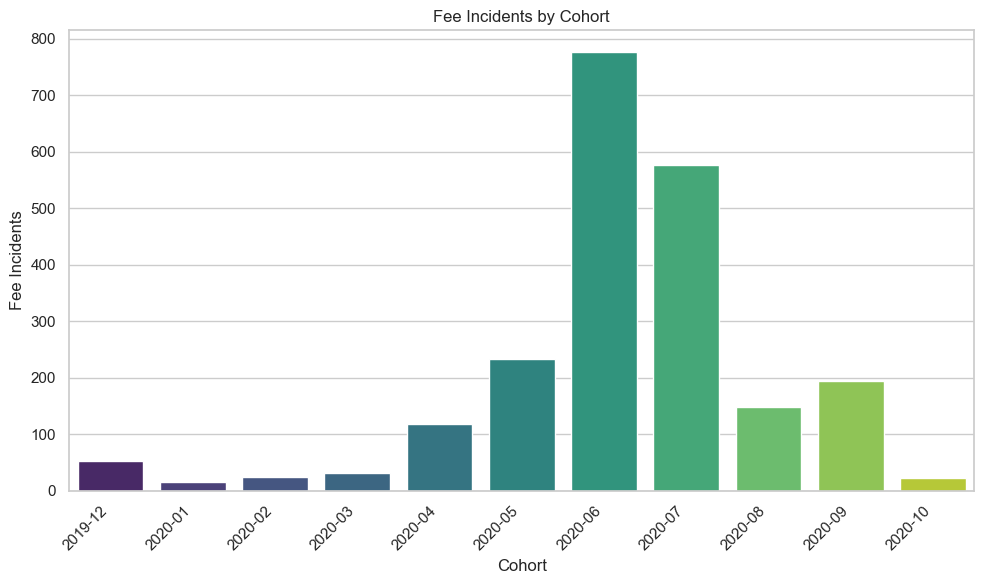

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=incident_feed, x='cohort', palette='viridis')  # <- Notice y='Country' instead of x
# incident_feed.pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Fee Incidents by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Fee Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
# fee incidents by cohort and type of incident.
pivot = incident_feed.pivot_table(
    index='cohort', 
    columns='category', 
    values='fee_id', 
    aggfunc='count'
).fillna(0)

pivot.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(12, 6)
)
plt.title("Fee Incidents by Cohort")
plt.xlabel("Cohort")
plt.ylabel("Fee Incidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#TODO por que hay tan pocos incidentes en 2020-10 cuando hay muchos cash requests